# MOVIES

# BUSINESS UNDERSTANDING
Everyone loves a story and movies tell them best.The movie industry whether hollywood,nollywood or even bollywood is a very profitable industry.Alot goes into making a film : production,casting ,distribution and many other major sectors.With that in mind before you decide to invest in the industry,you should research the factors that makes a movie do well in the box movie.In this analysis we will be focused on the genres that do well

<img src="blackish.jpeg" width="450" height="300" style="image-rendering: auto;">


# 2. Objectives

**2.1 Main objectives**
1. To investigate and analyze movies doing well in the box office in the last decade.

**2.2 specific objectives**
1. To identify the film genres with the highest grossing both domestic and foriegn grossing.
2. To provide insights on investment opportunities in the film industry.
3. To help stakeholders to plan and be aware of competition( studios' that are doing well)
4. To estimate a production budget on certain film genres.
5. To understand effects of ratings on profits.

**2.3 Metric of success**

To correctly identify the current box office highly grossing films over the last decade on merits such as genre, rating and worldwide_grossing 

# DATA UNDERSTANDING
There are 5 datasets and 1 dataframe namely:`bom_movie.gross.csv`, `tn.movie_budgets.csv` , `rt.movie_info.tsv` , `rt.reviwes.tsv`,`tmb.movies.csv` and `IMDB` database.They were derived from the following websites.
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)



# DATA CLEANING

In [5]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# `bom_movie.gross.csv`

In [6]:
bom_movie = pd.read_csv("bom.movie_gross.csv")
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Let's check for missing values in ` bom.movie_gross.csv ` and deal with them.

In [7]:
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Let's delete the 5 missing values for the `studio` column and make sure the column has all the records in uppercase and get rid of all whitespaces.

In [11]:
bom_movie['studio'].value_counts().head()

studio
IFC      166
UNI.     147
WB       140
FOX      136
MAGN.    136
Name: count, dtype: int64

In [12]:
# Convert to uppercase and remove all whitespace (including spaces, tabs)
bom_movie['studio'] = bom_movie['studio'].str.upper().str.replace(r'\s+', '', regex=True)


In [13]:
#delete null values
bom_movie = bom_movie.dropna(subset=['studio'])


The column  `foreign_gross` has a Dtype of object let's convert that to a float because it's numeric inputs and convert Invalid values to NAN.

In [14]:
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')


In [15]:
# Numeric columns
numeric_cols = bom_movie.select_dtypes(include=['number']).columns

# Categorical columns
categorical_cols = bom_movie.select_dtypes(include=['object', 'category']).columns

print(f"This are the numeric columns {numeric_cols}")
print(f"This are the the categorical columns {categorical_cols}")


This are the numeric columns Index(['domestic_gross', 'foreign_gross', 'year'], dtype='object')
This are the the categorical columns Index(['title', 'studio'], dtype='object')


In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(bom_movie.describe())

       domestic_gross  foreign_gross    year
count         3356.00        2028.00 3382.00
mean      28771489.56    75139698.51 2013.96
std       67006943.10   137633505.41    2.48
min            100.00         600.00 2010.00
25%         120000.00     3800000.00 2012.00
50%        1400000.00    19000000.00 2014.00
75%       27950000.00    75050000.00 2016.00
max      936700000.00   960500000.00 2018.00


Since the `domestic_gross` has a minumum value of 100 and maximum value of 936,700,000. We can't use the mean of 28,745,845 because mean it is highly senstive to extreme values which won't be the advisable to fill of the missing values.This will also apply to filling for missing values in the `foriegn_gross` column.
We therefore choose to use the median to fill for the missing values.

In [17]:
#fill for null values with median
bom_movie['domestic_gross'] = bom_movie['domestic_gross'].fillna(bom_movie['domestic_gross'].median())

In [18]:
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].median())

In [19]:
#check if we have remaining null values
bom_movie.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [20]:
bom_movie.shape

(3382, 5)

In [21]:
bom_movie.to_csv('cleanedbom_movie.csv', index=False)

# `tn.movie_budgets.csv` 

In [22]:
movie_budget = pd.read_csv("tn.movie_budgets.csv")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
movie_budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

This dataset does not contain any missing values,so let's check for duplicates and data types

In [24]:
movie_budget.duplicated().sum()

0

In [25]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


`production_budget`,`domestic_gross` and `worldwide_gross` are numeric values but have a datatype object let's convert it to float so we can easily work with it.


In [26]:
#list of columns that need cleaning
cols_to_convert = ['production_budget','domestic_gross','worldwide_gross']
# get rid of the $ and , and change data type to float
for col in cols_to_convert:
    movie_budget[col] = movie_budget[col].replace(r'[\$,]', '', regex=True).astype(float)

In [27]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.00,5782.00,5782.00,5782.00
mean,50.37,31587757.10,41873326.87,91487460.91
std,28.82,41812076.83,68240597.36,174719968.78
min,1.00,1100.00,0.00,0.00
25%,25.00,5000000.00,1429534.50,4125414.75
50%,50.00,17000000.00,17225945.00,27984448.50
75%,75.00,40000000.00,52348661.50,97645836.50
max,100.00,425000000.00,936662225.00,2776345279.00


In [28]:
movie_budget.shape

(5782, 6)

In [29]:
movie_budget.to_csv('cleanedmovie_budget.csv', index=False)

# `rt.movie_info.tsv`

In [30]:
movie_info = pd.read_csv("rt.movie_info.tsv", sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [31]:
movie_info = movie_info.drop(['synopsis', 'director','writer','theater_date','dvd_date','currency', 'box_office'], axis=1)


In [32]:
movie_info.isnull().sum()

id            0
rating        3
genre         8
runtime      30
studio     1066
dtype: int64

Let's fill for missing values.

In [33]:
# fill missing values of rating with NR
movie_info['rating'] = movie_info['rating'].fillna('NR')

In [34]:
movie_info['genre'] = movie_info['genre'].fillna('UNKOWN')

In [35]:
 # extract numeric part.astype(float)               # convert to float (allows NaN)
movie_info['runtime'] = (movie_info['runtime'].str.extract(r'(\d+)').astype(float))      

In [36]:
#get the mode of runtime
movie_info['runtime'].mode()

0   90.00
Name: runtime, dtype: float64

In [37]:
movie_info['runtime'] = movie_info['runtime'].fillna('90.0')

we'll have to drop the studio because it's missing almost 90% of the data

In [38]:
movie_info.drop('studio',axis=1, inplace=True)

In [39]:
movie_info.isnull().sum()

id         0
rating     0
genre      0
runtime    0
dtype: int64

In [40]:
movie_info.shape

(1560, 4)

In [41]:
movie_info.tail()

,id,rating,genre,runtime
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,106.00
1556,1997,PG,Comedy|Science Fiction and Fantasy,88.00
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,111.00
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101.00
1559,2000,R,Action and Adventure|Art House and Internation...,94.00


In [42]:
movie_info.to_csv('cleanedmovie_info.csv', index=False)

# `rt.reviwes.tsv`

In [43]:
movie_reviews =pd.read_csv("rt.reviews.tsv",sep ='\t',encoding ="Latin1")
movie_reviews.tail(7)

,id,review,rating,fresh,critic,top_critic,publisher,date
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [44]:
movie_reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [45]:
movie_reviews = movie_reviews.drop(['review','rating', 'critic','publisher'], axis=1)

In [46]:
movie_reviews.columns

Index(['id', 'fresh', 'top_critic', 'date'], dtype='object')

In [47]:
movie_reviews.shape

(54432, 4)

In [48]:
movie_reviews.to_csv('cleanedmovie_reviews.csv', index=False)

# MERGING DATASETS

# 3.1 merging dataset 1

Let's begin by merging the `cleanedmovie_info.csv` with the `cleanedmovie_reviews` **with a inner join**.

In [49]:
movie_info = pd.read_csv('cleanedmovie_info.csv')
movie_reviews= pd.read_csv('cleanedmovie_reviews.csv')
info_reviews = pd.merge(movie_info, movie_reviews, on='id', how='inner')


In [50]:
info_reviews.head()

,id,rating,genre,runtime,fresh,top_critic,date
0,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"November 10, 2018"
1,3,R,Drama|Science Fiction and Fantasy,108.00,rotten,0,"May 23, 2018"
2,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"January 4, 2018"
3,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"November 16, 2017"
4,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"October 12, 2017"


In [51]:
info_reviews.shape

(54432, 7)

In [52]:
info_reviews.isnull().sum()


id            0
rating        0
genre         0
runtime       0
fresh         0
top_critic    0
date          0
dtype: int64

let's change the column date to datetime so that it's easy to work with

In [53]:
info_reviews['date'] = pd.to_datetime(info_reviews['date'], errors='coerce')

In [54]:
info_reviews.head()

,id,rating,genre,runtime,fresh,top_critic,date
0,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,2018-11-10
1,3,R,Drama|Science Fiction and Fantasy,108.00,rotten,0,2018-05-23
2,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,2018-01-04
3,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,2017-11-16
4,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,2017-10-12


After cleaning our merged dataframes,let's save the final product.

In [55]:
info_reviews.to_csv('mergedinfo_reviews.csv', index=False)

#  3.2 merging dataset 2

Now, let's do a **left join** to merge `cleanedmovie_budget.csv` with the `cleanedbom_movie.csv`

In [133]:
movie_budget = pd.read_csv('cleanedmovie_budget.csv')
bom_movie = pd.read_csv('cleanedbom_movie.csv')

merged_df = pd.merge(movie_budget, bom_movie, left_on='movie', right_on='title', how='left')
merged_df.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,Pirates of the Caribbean: On Stranger Tides,BV,241100000.00,804600000.00,2011.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,Avengers: Infinity War,BV,678800000.00,19000000.00,2018.00
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.00,309420425.00,963420425.00,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,300000000.00,229024295.00,655945209.00,Justice League,WB,229000000.00,428900000.00,2017.00
9,10,"Nov 6, 2015",Spectre,300000000.00,200074175.00,879620923.00,Spectre,SONY,200100000.00,680600000.00,2015.00


In [134]:
merged_df.shape

(5782, 11)

In [135]:
merged_df.isnull().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross_x        0
worldwide_gross         0
title                4536
studio               4536
domestic_gross_y     4536
foreign_gross        4536
year                 4536
dtype: int64

Since they are columns existing twice like the `domestic_gross`, let's drop the one with missing values.The column `release_date` and `year` have the same contents so it only makes sense we get rid of `year` because of the missing values it has.

In [136]:
merged_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'title', 'studio', 'domestic_gross_y',
       'foreign_gross', 'year'],
      dtype='object')

In [137]:
merged_df = merged_df.drop(['title', 'domestic_gross_y', 'year'], axis=1)


In [138]:
merged_df['studio'] = merged_df['studio'].fillna('UNK')


In [139]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')


In [140]:
merged_df.describe()

,id,release_date,production_budget,domestic_gross_x,worldwide_gross,foreign_gross
count,5782.00,5782,5782.00,5782.00,5782.00,1246.00
mean,50.37,2004-07-06 05:20:31.546177792,31587757.10,41873326.87,91487460.91,90172681.53
min,1.00,1915-02-08 00:00:00,1100.00,0.00,0.00,600.00
25%,25.00,2000-04-22 18:00:00,5000000.00,1429534.50,4125414.75,13525000.00
50%,50.00,2007-03-02 00:00:00,17000000.00,17225945.00,27984448.50,26050000.00
75%,75.00,2012-12-25 00:00:00,40000000.00,52348661.50,97645836.50,94375000.00
max,100.00,2020-12-31 00:00:00,425000000.00,936662225.00,2776345279.00,946400000.00
std,28.82,NaN,41812076.83,68240597.36,174719968.78,146195058.98


In [141]:
merged_df['foreign_gross_estimate'] =merged_df['worldwide_gross'] - merged_df['domestic_gross_x']

In [142]:
merged_df.head(11)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,foreign_gross_estimate
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,UNK,NaN,2015837654.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,BV,804600000.00,804600000.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,UNK,NaN,107000000.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,BV,946400000.00,944008095.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,UNK,NaN,696540365.00
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,UNK,NaN,1116648995.00
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,BV,19000000.00,1369318718.00
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.00,309420425.00,963420425.00,UNK,NaN,654000000.00
8,9,2017-11-17,Justice League,300000000.00,229024295.00,655945209.00,WB,428900000.00,426920914.00
9,10,2015-11-06,Spectre,300000000.00,200074175.00,879620923.00,SONY,680600000.00,679546748.00


we can generate `foreign_gross` by subtrating the `worldwide_gross` and the `domestic_gross_x` columns. If you compare the new column `foreign_gross_estimate` gives as values almost similar to `foreign_gross`. instead of taking the `foriegn_gross` whose values are rounded of and missing we can opt to use`foriegn_gross_estimate`.

In [143]:
merged_df = merged_df.drop([ 'foreign_gross_estimate'], axis=1)

In [144]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross_x   5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   studio             5782 non-null   object        
 7   foreign_gross      1246 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 361.5+ KB


In [145]:
merged_df.to_csv('mergedbom_budgets.csv', index=False)

# USING THE `IMDB` DATABASE.

we will use the **IMDB** database `im.db.zip` but we will only focuse on two tables `movie_basics` and `movie_ratings` tables.

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)


In [69]:
import sqlite3
import zipfile
import os
zipfile.ZipFile("im.db.zip", 'r').extractall("temp_folder")
conn = sqlite3.connect("temp_folder/im.db")

In [70]:
df = pd.read_sql("""SELECT name 
                    FROM sqlite_master
                    WHERE type ='table';""",conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Let's get to see the contents of the `movie_basics` table.

In [71]:
df = pd.read_sql(""" SELECT *
                     FROM  movie_basics
                     LIMIT 10;""",conn)
df                   

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.00,Biography


The table has 6 columns and if you pay close attention to the `runtime` column contains null values.Also, the `primary_title` and `original_title` have similar records that differ only slightly.

In [72]:
df = pd.read_sql(""" SELECT *
                     FROM movie_ratings
                     LIMIT 5;""",conn)
df                   

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


The table `movie_ratings` has only 3 columns and has a similar table to `movie_basics`.Let's join our tables with a common column known as `movie_id` and arrange from the first `movie_id`.

In [73]:
df = pd.read_sql("""SELECT 
    movie_basics.movie_id,
    movie_basics.primary_title,
    movie_basics.genres,
    movie_ratings.numvotes,
    movie_ratings.averagerating
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY movie_ratings.movie_id ASC
LIMIT 10;""",conn)
df


,movie_id,primary_title,genres,numvotes,averagerating
0,tt0063540,Sunghursh,"Action,Crime,Drama",77,7.00
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",43,7.20
2,tt0069049,The Other Side of the Wind,Drama,4517,6.90
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",13,6.10
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",119,6.50
5,tt0112502,Bigfoot,"Horror,Thriller",32,4.10
6,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",263,8.10
7,tt0146592,Pál Adrienn,Drama,451,6.80
8,tt0154039,So Much for Justice!,History,64,4.60
9,tt0159369,Cooper and Hemingway: The True Gen,Documentary,53,7.60


Let's get to know the most popular genre.

In [74]:
df = pd.read_sql("""SELECT  mb.genres,
    AVG(mr.averagerating) AS avg_rating,
    COUNT(genres) AS movie_count
FROM movie_basics AS mb
JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY movie_count DESC
LIMIT 5;""",conn)
df

,genres,avg_rating,movie_count
0,Drama,6.49,11612
1,Documentary,7.29,10313
2,Comedy,5.78,5613
3,Horror,4.84,2692
4,"Comedy,Drama",6.36,2617


Inorder to conduct even more analysis on this two tables , let's change and save them as a csv file.

In [75]:
query = ("""SELECT 
    movie_basics.movie_id,
    movie_basics.primary_title,
    movie_basics.genres,
    movie_ratings.averagerating,
    movie_ratings.numvotes
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY movie_basics.movie_id ASC;""")



In [76]:
df = pd.read_sql_query(query, conn)


In [77]:
df.to_csv("merged_imdb.csv", index=False)

In [78]:
#close connection
conn.close()

In [79]:
merged_imdb = pd.read_csv('merged_imdb.csv')
df.head()

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.50,119


In [80]:
merged_imdb.isnull().sum()

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

In [81]:
merged_imdb.shape

(73856, 5)

Since genre has 804 missing values, fill for them with UNKOWN.

In [82]:
merged_imdb['genres'] = merged_imdb['genres'].fillna('UNK')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


# 5. EXPLANATORY DATA ANALYSIS

### 5.1 UNIVARIATE ANALYSIS

From the `merged_imdb.csv` ,let's get to see the most popular genres.

In [87]:
# Split, explode, and clean genres
merged_imdb['genres'] = merged_imdb['genres'].str.split(',')
merged_imdb= merged_imdb.explode('genres')
merged_imdb['genres'] = merged_imdb['genres'].str.strip()


In [88]:
genre_counts = merged_imdb['genres'].value_counts().sort_values(ascending=False).nlargest(20)
genre_counts.head()

genres
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Name: count, dtype: int64

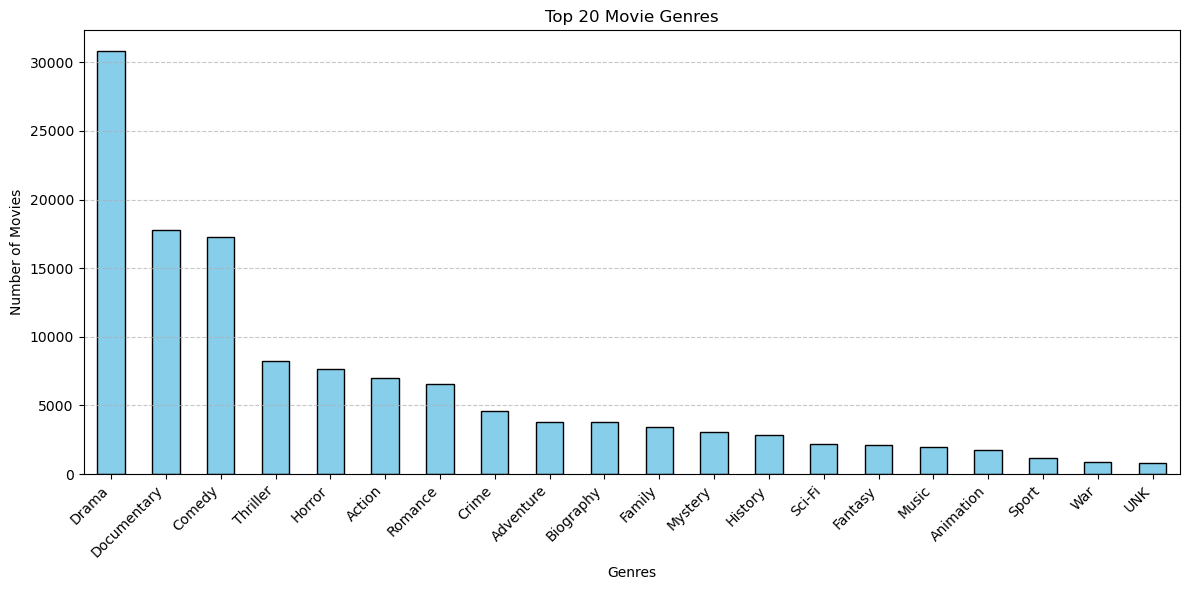

In [92]:
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 20 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [98]:
# This gives proportions instead of raw counts
top_10_genres = merged_imdb['genres'].value_counts().head(10)
total_genres = merged_imdb['genres'].count()
top_10_percentages = (top_10_genres / total_genres) * 100
print(top_10_genres)

genres
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Name: count, dtype: int64


### BIVARIATE ANALYSIS

We'll be trying to analyze the studio's with the highest production budget and highest grossing both domestic and foriegn gross.Inorder to do this we will use the `mergedbom_budgets.csv`

In [146]:
budget = pd.read_csv('mergedbom_budgets.csv')

In [147]:
budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'foreign_gross'],
      dtype='object')

In [148]:
studio_gross = budget.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False)
studio_gross.head()

studio
UNK    339283093903.00
BV      33286017937.00
UNI.    27329288200.00
FOX     26795813328.00
WB      22193811969.00
Name: worldwide_gross, dtype: float64

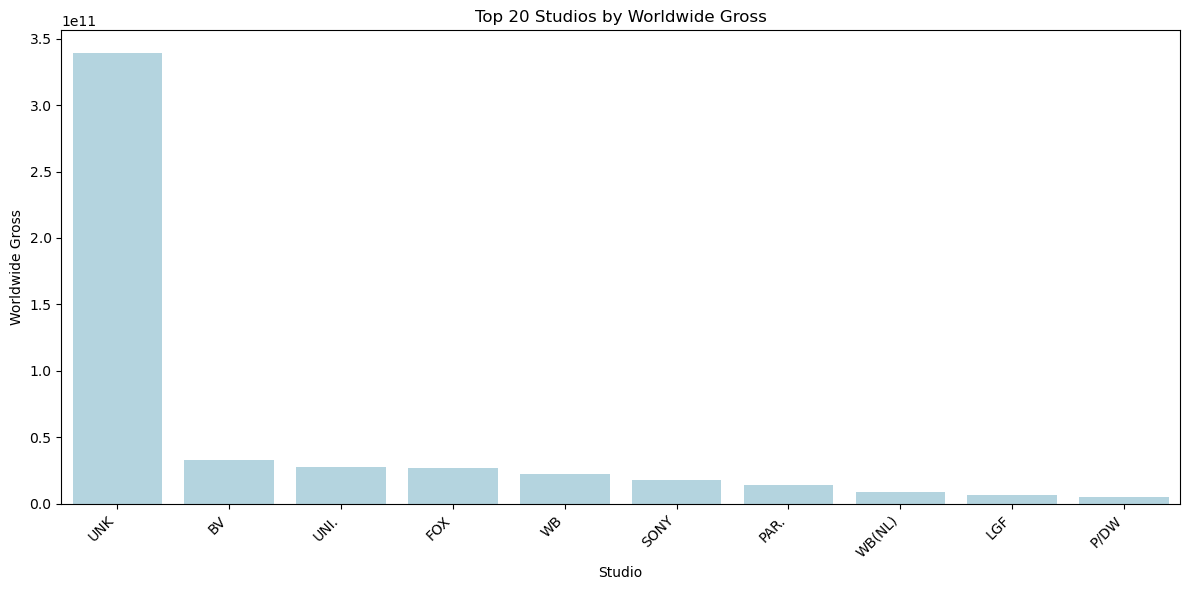

In [149]:
top_studios = studio_gross.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_studios.index, y=top_studios.values, color='lightblue')

plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Studios by Worldwide Gross')
plt.xlabel('Studio')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()


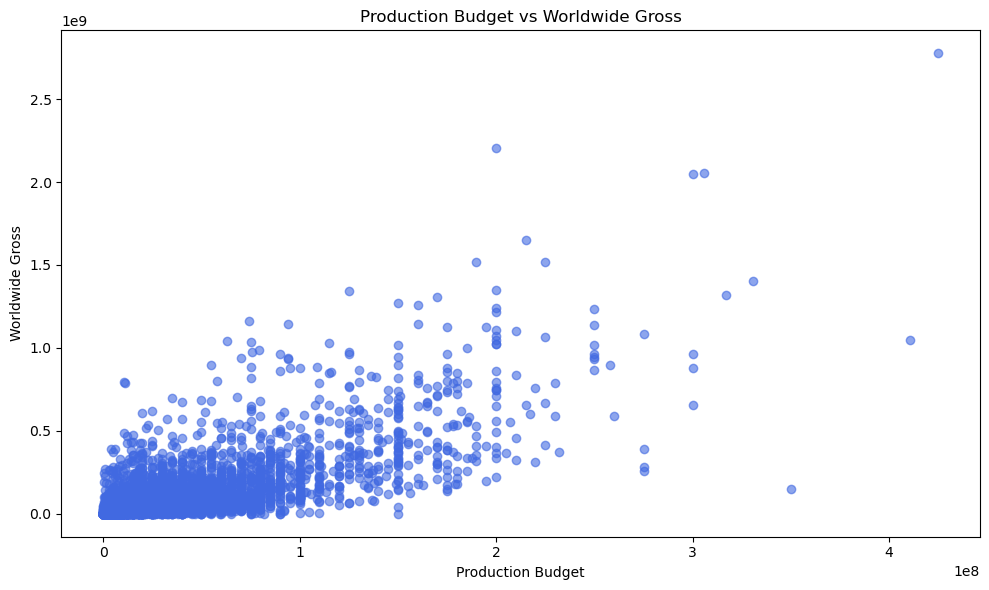

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(budget['production_budget'], budget['worldwide_gross'], alpha=0.6, color='royalblue')

plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()


In [151]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross_x   5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   studio             5782 non-null   object 
 7   foreign_gross      1246 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 361.5+ KB


In [153]:
budget['release_date'] = pd.to_datetime(budget['release_date'], errors='coerce')

In [154]:
budget['release_date'] = budget['release_date'].dt.year

In [155]:
recent_years = budget['release_date'].sort_values().unique()[-10:]
filtered = budget[budget['release_date'].isin(recent_years)]

In [156]:
gross_by_year = filtered.groupby('release_date')[['domestic_gross_x', 'foreign_gross']].sum()

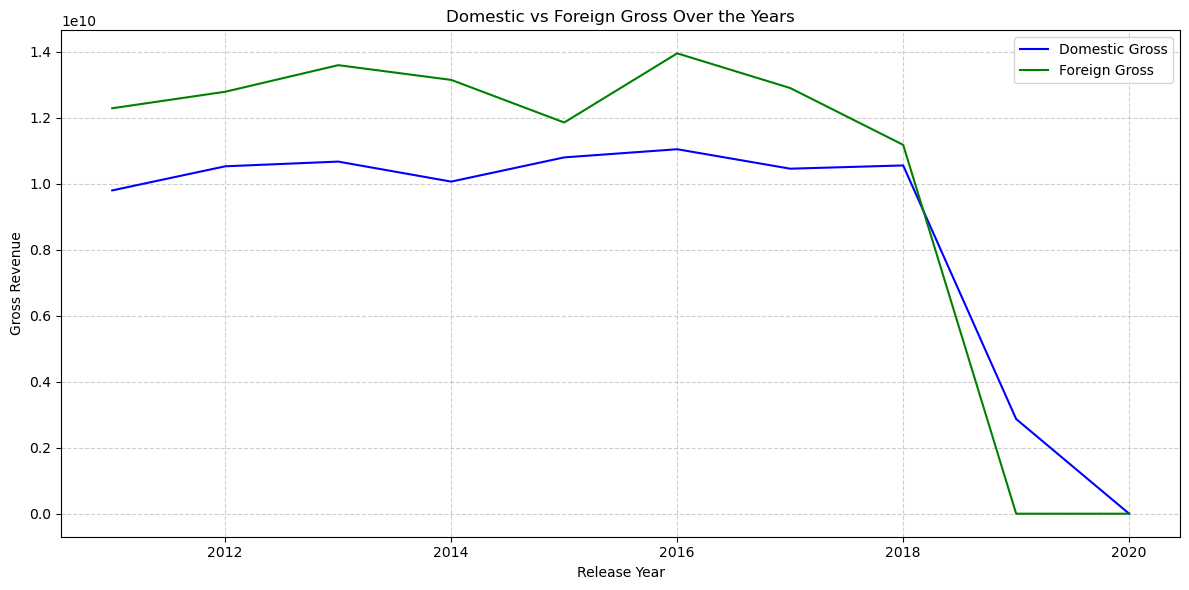

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(gross_by_year.index, gross_by_year['domestic_gross_x'], label='Domestic Gross', color='blue')
plt.plot(gross_by_year.index, gross_by_year['foreign_gross'], label='Foreign Gross', color='green')

plt.title('Domestic vs Foreign Gross Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [158]:
# Step 1: Group by year and sum domestic gross
gross_by_year = budget.groupby('release_date')['domestic_gross_x'].sum()

# Step 2: Get gross for 2018 and 2020
domestic_2018 = gross_by_year.get(2018, 0)
domestic_2020 = gross_by_year.get(2020, 0)

# Step 3: Calculate drop
drop = domestic_2018 - domestic_2020

# Step 4: Calculate percentage drop (only if 2018 was not zero)
if domestic_2018 != 0:
    percent_drop = (drop / domestic_2018) * 100
else:
    percent_drop = None  # or handle as 'undefined'

# Display results
print(f"Domestic Gross in 2018: {domestic_2018}")
print(f"Domestic Gross in 2020: {domestic_2020}")
print(f"Absolute Drop: {drop}")
if percent_drop is not None:
    print(f"Percentage Drop: {percent_drop:.2f}%")
else:
    print("Percentage drop is undefined (2018 gross is 0).")


Domestic Gross in 2018: 10551784370.0
Domestic Gross in 2020: 0.0
Absolute Drop: 10551784370.0
Percentage Drop: 100.00%


Let's analyse the genre with great ratings using the dataset `mergedinfo_reviews.csv`.

In [162]:
df =pd.read_csv('mergedinfo_reviews.csv')

In [163]:
df.columns

Index(['id', 'rating', 'genre', 'runtime', 'fresh', 'top_critic', 'date'], dtype='object')

In [167]:
df['genre'] = df['genre'].str.split(',')
df= df.explode('genre')
df['genre'] = df['genre'].str.strip()

In [168]:
genre_fresh_counts = df.groupby(['genre', 'fresh']).size().reset_index(name='count')
genre_fresh_counts.head()

,genre,fresh,count
0,,fresh,128142
1,,rotten,83572
2,A,fresh,21247
3,A,rotten,13930
4,C,fresh,14563


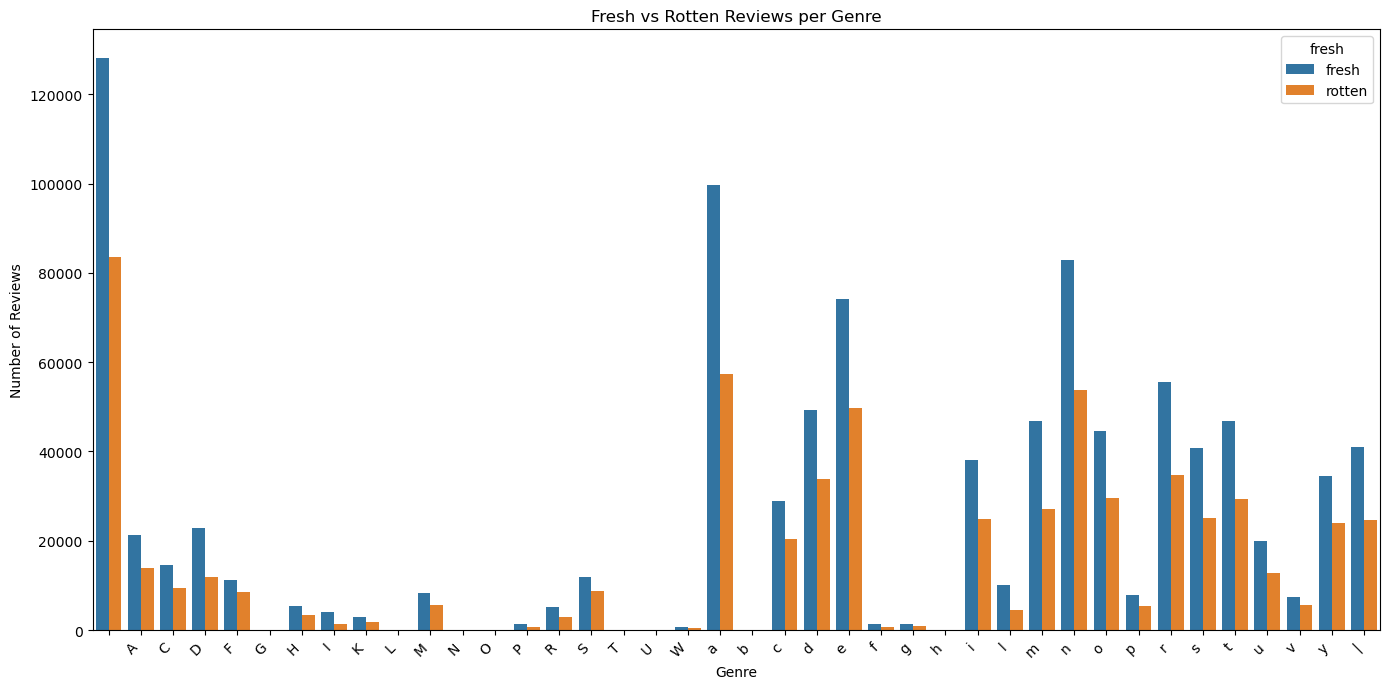

In [169]:
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_fresh_counts, x='genre', y='count', hue='fresh')

plt.title('Fresh vs Rotten Reviews per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Multivariate analysis

# RECOMMENDATIONS